In [105]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix

In [106]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [107]:
X_valid = X_train_full[:5000] / 255.0
X_train = X_train_full[5000:] / 255.0
X_test = X_test / 255.0

y_valid = y_train_full[:5000]
y_train = y_train_full[5000:]

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [108]:
from functools import partial

my_dense_layer = partial(tf.keras.layers.Dense, activation="tanh", kernel_regularizer=tf.keras.regularizers.l2(0.0001))
my_conv_layer = partial(tf.keras.layers.Conv2D, activation="tanh", padding="valid")

model = tf.keras.models.Sequential([
    my_conv_layer(16,5,padding="same",input_shape=[28,28,1]),
    tf.keras.layers.MaxPooling2D(2),
    my_conv_layer(32,5),
    tf.keras.layers.MaxPooling2D(2),
    
    my_conv_layer(120,5),
    tf.keras.layers.Flatten(),
    my_dense_layer(84),
    my_dense_layer(10, activation="softmax")
])

In [109]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             metrics=["accuracy"])

In [110]:
history = model.fit(X_train, y_train, epochs=3, validation_data=(X_valid,y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/3
55000/55000 [==============================] - 73s 1ms/sample - loss: 0.4506 - accuracy: 0.8415 - val_loss: 0.3220 - val_accuracy: 0.8888
Epoch 2/3
55000/55000 [==============================] - 71s 1ms/sample - loss: 0.3128 - accuracy: 0.8889 - val_loss: 0.2991 - val_accuracy: 0.8916
Epoch 3/3
55000/55000 [==============================] - 71s 1ms/sample - loss: 0.2693 - accuracy: 0.9054 - val_loss: 0.2693 - val_accuracy: 0.9080


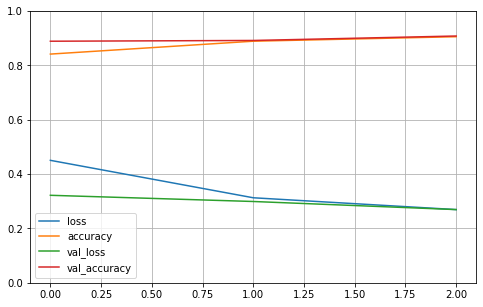

In [111]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [112]:
y_pred = model.predict_classes(X_train)
conf_train = confusion_matrix(y_train, y_pred)
print(conf_train)

[[4636    3   48  107   13    2  713    0   21    0]
 [   1 5343    1   81    4    0   12    0    2    0]
 [  58    2 4836   44  247    0  308    0    1    0]
 [  54    6   11 5177  110    0  139    0    2    0]
 [   1    2  356  146 4565    0  437    0    5    0]
 [   0    0    1    1    0 5394    0   97    2   12]
 [ 368    2  275   75  156    0 4620    0   11    0]
 [   0    0    0    0    0   25    0 5384    0   79]
 [   6    0    4   13   18    1   27    7 5434    0]
 [   0    0    0    0    1   42    0  171    0 5280]]


In [113]:
model.evaluate(X_test,y_test) 

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.29529134674072266, 0.8988]

In [114]:
y_pred = model.predict_classes(X_test)
conf_test = confusion_matrix(y_test, y_pred)
print(conf_test)

[[804   1  12  19   3   1 152   0   8   0]
 [  0 973   1  17   3   0   4   0   2   0]
 [ 15   1 855  10  50   0  68   0   1   0]
 [  7   3   7 919  21   0  40   0   3   0]
 [  0   0  79  32 792   0  96   0   1   0]
 [  0   0   0   0   0 967   1  26   0   6]
 [ 76   0  60  25  48   0 783   0   8   0]
 [  0   0   0   0   0   9   0 974   0  17]
 [  2   1   1   6   3   1   2   5 978   1]
 [  0   0   0   0   0  14   0  43   0 943]]
